In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("monthly_milk_production.csv", index_col="Date", parse_dates=True)

In [3]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Production  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


In [5]:
df.tail()

,Production
Date,
1975-08-01,858
1975-09-01,817
1975-10-01,827
1975-11-01,797
1975-12-01,843


In [6]:
df.loc["1970-04":"1970-07"]

,Production
Date,
1970-04-01,824
1970-05-01,886
1970-06-01,859
1970-07-01,819


In [7]:
df.loc["1967"].mean()

Production    732.916667
dtype: float64

In [8]:
df.loc["1967"].sum()

Production    8795
dtype: int64

In [9]:
df.loc["1970-08":"1971-07"].mean()

Production    812.833333
dtype: float64

In [10]:
average_production = np.round(np.array([df.loc[f"{i}"].mean() for i in range(1962, 1976)]), decimals=2)

In [11]:
average_production

array([[615.75],
       [630.  ],
       [658.75],
       [673.08],
       [708.75],
       [732.92],
       [748.83],
       [763.92],
       [782.  ],
       [834.08],
       [854.17],
       [842.58],
       [858.42],
       [862.67]])

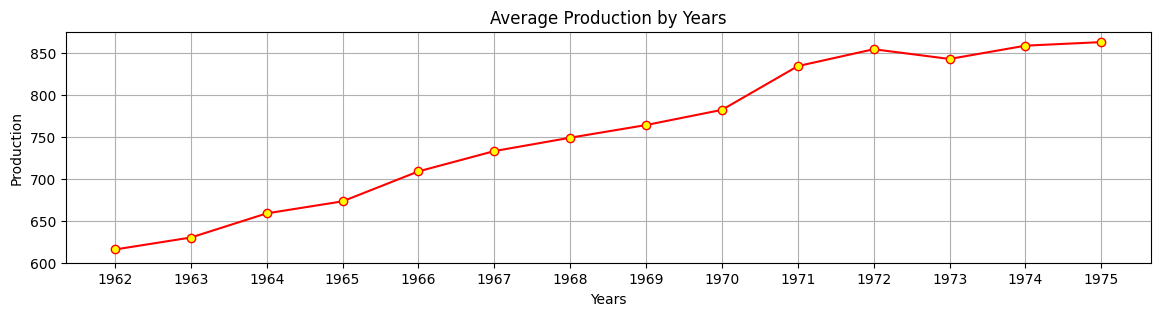

In [12]:
plt.figure(figsize=(14, 3))
plt.plot(range(1962, 1976), average_production, marker="o", markerfacecolor="yellow", color="red")
plt.xticks(range(1962, 1976))
plt.yticks(range(600, 900, 50))
plt.grid()
plt.title("Average Production by Years")
plt.xlabel("Years")
plt.ylabel("Production")
plt.show()

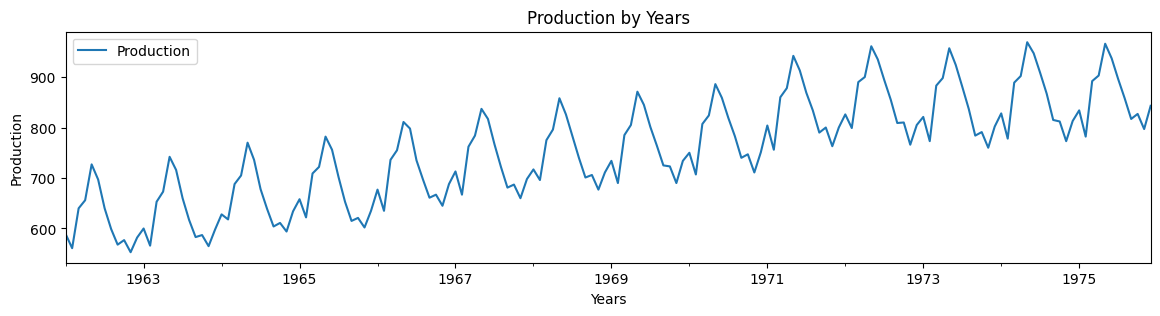

In [13]:
df.plot(figsize=(14, 3))
plt.title("Production by Years")
plt.xlabel("Years")
plt.ylabel("Production")
plt.show()

In [14]:
decompose = seasonal_decompose(df)

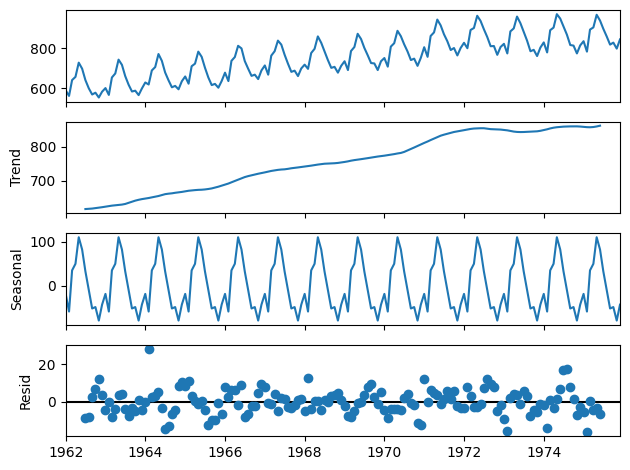

In [15]:
decompose.plot();

In [16]:
len(df)

168

In [17]:
train = df.iloc[:len(df)-12]
train

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1974-08-01,867
1974-09-01,815
1974-10-01,812


In [18]:
test = df.iloc[len(df)-12:]
test

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817


In [19]:
train.head(1), train.tail(1)

(            Production
 Date                  
 1962-01-01         589,
             Production
 Date                  
 1974-12-01         813)

In [20]:
train.min(), train.max()

(Production    553
 dtype: int64,
 Production    969
 dtype: int64)

In [21]:
scaler = MinMaxScaler()

In [22]:
scaler.fit(train)

MinMaxScaler()

In [23]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [24]:
scaled_train.min(), scaled_train.max()

(0.0, 1.0000000000000002)

In [25]:
train.tail()

,Production
Date,
1974-08-01,867
1974-09-01,815
1974-10-01,812
1974-11-01,773
1974-12-01,813


In [26]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=12, batch_size=1)

In [27]:
generator

In [28]:
generator[1]

(array([[[0.01923077],
         [0.20913462],
         [0.24759615],
         [0.41826923],
         [0.34615385],
         [0.20913462],
         [0.11057692],
         [0.03605769],
         [0.05769231],
         [0.        ],
         [0.06971154],
         [0.11298077]]]),
 array([[0.03125]]))

In [29]:
scaled_train[1:14]

array([[0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154],
       [0.11298077],
       [0.03125   ]])

In [30]:
input, output = generator[0]

In [31]:
input.shape

(1, 12, 1)

In [32]:
output.shape

(1, 1)

In [33]:
model = Sequential([
    LSTM(3000, activation="relu", input_shape=((12, 1))),  ### use 3000 unit of lstm
    Dense(1)
])

In [34]:
model.compile(optimizer="adam", loss="mse")

In [35]:
model.fit(generator, epochs=30)

Epoch 1/30

144/144 [==============================] - 118s 810ms/step - loss: 0.0382
Epoch 2/30
144/144 [==============================] - 116s 803ms/step - loss: 0.0083
Epoch 3/30
144/144 [==============================] - 114s 793ms/step - loss: 0.0062
Epoch 4/30
144/144 [==============================] - 114s 794ms/step - loss: 0.0054
Epoch 5/30
144/144 [==============================] - 114s 790ms/step - loss: 0.0028
Epoch 6/30
144/144 [==============================] - 114s 791ms/step - loss: 0.0036
Epoch 7/30
144/144 [==============================] - 114s 793ms/step - loss: 0.0031
Epoch 8/30
144/144 [==============================] - 114s 795ms/step - loss: 0.0023
Epoch 9/30
144/144 [==============================] - 114s 795ms/step - loss: 0.0045
Epoch 10/30
144/144 [==============================] - 114s 794ms/step - loss: 0.0027
Epoch 11/30
144/144 [==============================] - 114s 795ms/step - loss: 0.0026
Epoch 12/30
144/144 [==============================] - 114s 79

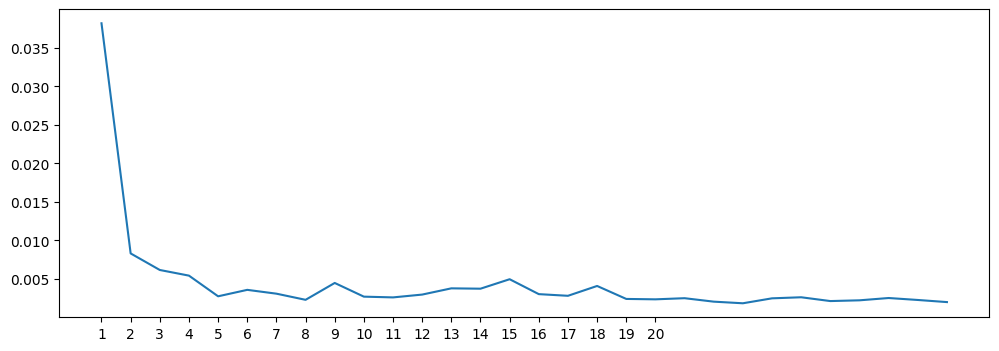

In [37]:
plt.figure(figsize=(12, 4))
plt.plot(range(1, 31), model.history.history["loss"])
plt.xticks(range(1, 21))
plt.show()

In [38]:
last_train_batch = scaled_train[-12:]
last_train_batch

array([[0.66105769],
       [0.54086538],
       [0.80769231],
       [0.83894231],
       [1.        ],
       [0.94711538],
       [0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ]])

In [39]:
last_train_batch = last_train_batch.reshape((1, 12, 1))

In [40]:
last_train_batch

array([[[0.66105769],
        [0.54086538],
        [0.80769231],
        [0.83894231],
        [1.        ],
        [0.94711538],
        [0.85336538],
        [0.75480769],
        [0.62980769],
        [0.62259615],
        [0.52884615],
        [0.625     ]]])

In [41]:
model.predict(last_train_batch)[0]

1/1 [==============================] - 0s 306ms/step


array([0.66030663], dtype=float32)

In [42]:
scaled_test[0]

array([0.67548077])

In [43]:
test_pred = []

In [44]:
first_eval_batch = scaled_train[-12:]
current_batch = first_eval_batch.reshape((1, 12, 1))

In [45]:
current_batch

array([[[0.66105769],
        [0.54086538],
        [0.80769231],
        [0.83894231],
        [1.        ],
        [0.94711538],
        [0.85336538],
        [0.75480769],
        [0.62980769],
        [0.62259615],
        [0.52884615],
        [0.625     ]]])

In [46]:
for i in range(len(test)):
    current_prediction = model.predict(current_batch)[0]
    test_pred.append(current_prediction)

    current_batch = np.append(current_batch[:, 1:, :], [[current_prediction]], axis=1)

1/1 [==============================] - 0s 112ms/step


In [47]:
test_pred

[array([0.66030663], dtype=float32),
 array([0.5610836], dtype=float32),
 array([0.78713155], dtype=float32),
 array([0.82867736], dtype=float32),
 array([0.97636515], dtype=float32),
 array([0.93483204], dtype=float32),
 array([0.840679], dtype=float32),
 array([0.7513762], dtype=float32),
 array([0.63916886], dtype=float32),
 array([0.62678427], dtype=float32),
 array([0.54820615], dtype=float32),
 array([0.62470925], dtype=float32)]

In [48]:
test

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817


In [49]:
true_predictions = scaler.inverse_transform(test_pred)

In [50]:
true_predictions

array([[827.68755913],
       [786.41078377],
       [880.44672394],
       [897.7297802 ],
       [959.16790199],
       [941.89012718],
       [902.72245979],
       [865.57250404],
       [818.89424515],
       [813.74225426],
       [781.05375862],
       [812.87904739]])

In [51]:
test["Predicted_Production"] = true_predictions

In [52]:
test

,Production,Predicted_Production
Date,,
1975-01-01,834,827.687559
1975-02-01,782,786.410784
1975-03-01,892,880.446724
1975-04-01,903,897.729780
1975-05-01,966,959.167902
1975-06-01,937,941.890127
1975-07-01,896,902.722460
1975-08-01,858,865.572504
1975-09-01,817,818.894245


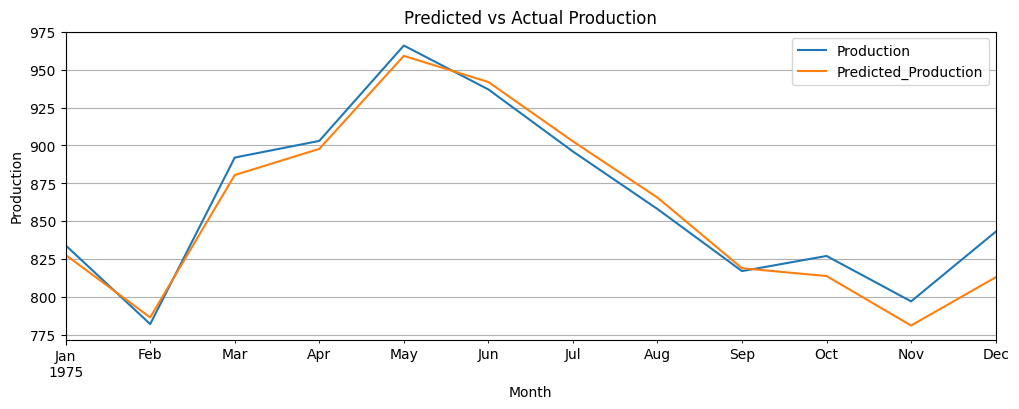

In [53]:
test.plot(figsize=(12, 4), xlabel="Month", ylabel="Production", title="Predicted vs Actual Production")
plt.grid()
plt.show()

In [54]:
rmse = np.sqrt(mean_squared_error(test["Production"], test["Predicted_Production"]))

In [55]:
rmse

12.022863305724057

In [56]:
test.mean()

Production              862.666667
Predicted_Production    857.349762
dtype: float64

In [57]:
lower_error, upper_error = test.mean()[0]-rmse, test.mean()[0]+rmse

In [58]:
lower_error, upper_error

(850.6438033609426, 874.6895299723907)